In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Initial Data Exploration

In [39]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [41]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


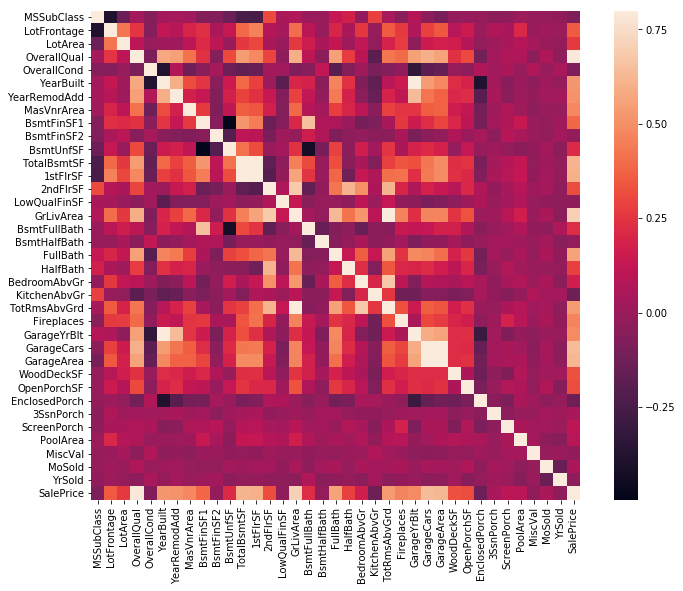

In [42]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109837438>]], dtype=object)

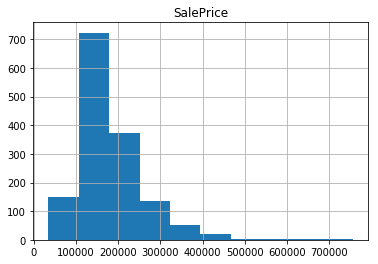

In [43]:
df.hist(column='SalePrice')

In [44]:
df['SalePrice'].median()

163000.0

# 2. Clean Data Exploration

In [138]:
df_clean = pd.read_csv("cleaned_train.csv", index_col=0)
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,None,3,Lvl,Inside,2,...,0,0,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,None,3,Lvl,FR2,2,...,0,0,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,None,2,Lvl,Inside,2,...,0,0,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,None,2,Lvl,Corner,2,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,None,2,Lvl,FR2,2,...,0,0,None,None,0,12,2008,WD,Normal,250000


In [63]:
df_clean[df_clean.columns[1:]].corr()['SalePrice'][:-1]

LotFrontage      0.334544
LotArea          0.263843
LotShape        -0.267759
LandSlope       -0.051152
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrType       0.426703
MasVnrArea       0.472614
BsmtQual         0.585207
BsmtCond         0.212607
BsmtExposure     0.375168
BsmtFinType1     0.304908
BsmtFinSF1       0.386420
BsmtFinType2    -0.002332
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
HeatingQC        0.427649
CentralAir       0.251328
X1stFlrSF        0.605852
X2ndFlrSF        0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
KitchenQual      0.659600
TotRmsAbvGrd     0.533723
Functional       0.107619
Fireplaces       0.466929
FireplaceQu      0.520438
GarageYrBlt      0.508043
GarageFinish     0.549247
GarageCars  

### BASEMENT CORRELATIONS

In [50]:
df_bas = df_clean[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
             'SalePrice']]

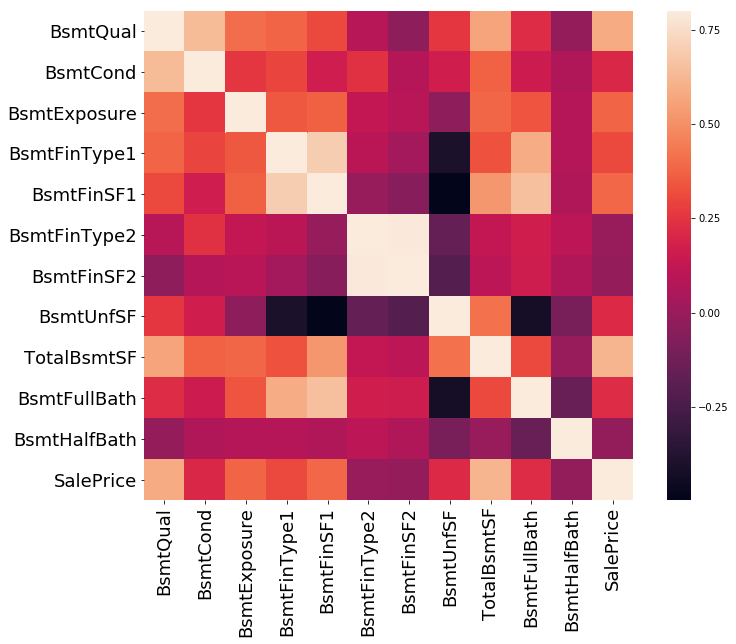

In [51]:
corrmat = df_bas.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [52]:
print(df_bas.corr())

              BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
BsmtQual      1.000000  0.633713      0.400392      0.377398    0.304607   
BsmtCond      0.633713  1.000000      0.256033      0.299089    0.165801   
BsmtExposure  0.400392  0.256033      1.000000      0.346552    0.368145   
BsmtFinType1  0.377398  0.299089      0.346552      1.000000    0.695751   
BsmtFinSF1    0.304607  0.165801      0.368145      0.695751    1.000000   
BsmtFinType2  0.086693  0.242844      0.124600      0.100620   -0.008361   
BsmtFinSF2   -0.030991  0.081904      0.094359      0.033052   -0.050117   
BsmtUnfSF     0.257158  0.168821     -0.033967     -0.400184   -0.495251   
TotalBsmtSF   0.564299  0.372530      0.383227      0.332420    0.522396   
BsmtFullBath  0.223495  0.156465      0.337876      0.589056    0.649212   
BsmtHalfBath -0.013362  0.064811      0.077930      0.077831    0.067418   
SalePrice     0.585207  0.212607      0.375168      0.304908    0.386420   

           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f787748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a17ccbe10>]], dtype=object)

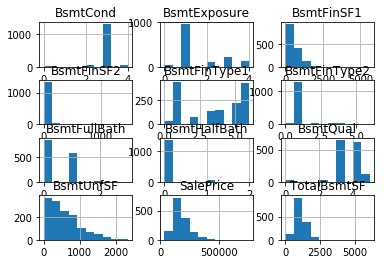

In [77]:
df_bas.hist()

#### 1. Can remove "BsmtFinType1" because it is highly correlated to "BsmtFinSF1" 

#### 2. Combined Basement Quality & Condition

#### 3. Can remove "BsmtFinSF2", "BsmtFinType2" because they are poor predictors

### OUTSIDE AREA CORRELATIONS

In [134]:
df_out = df_clean[['OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'WoodDeckSF',
                   'Fence', 'MiscFeature',
        'MiscFeature', 'MiscVal', 'PoolArea', 'PoolQC', 'Fence', 'SalePrice']]

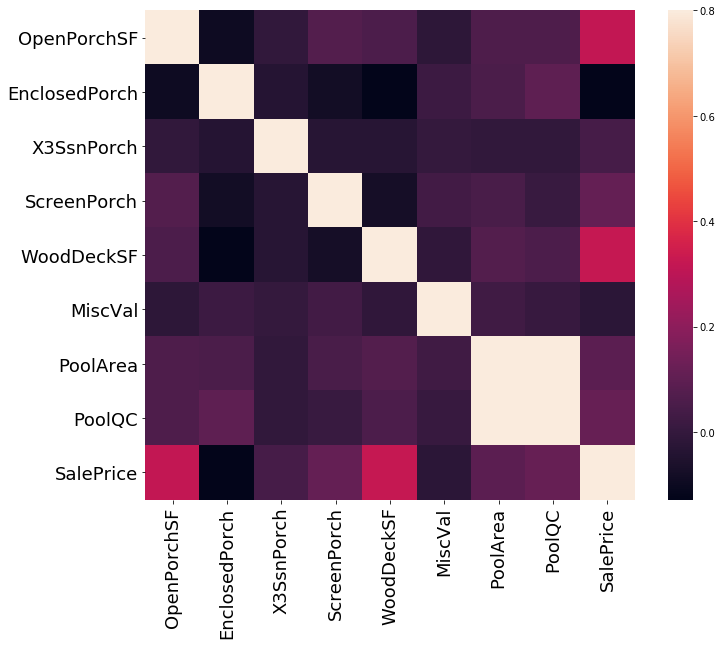

In [128]:
corrmat = df_out.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [129]:
print(df_out.corr())

               OpenPorchSF  EnclosedPorch  X3SsnPorch  ScreenPorch  \
OpenPorchSF       1.000000      -0.093079   -0.005842     0.074304   
EnclosedPorch    -0.093079       1.000000   -0.037305    -0.082864   
X3SsnPorch       -0.005842      -0.037305    1.000000    -0.031436   
ScreenPorch       0.074304      -0.082864   -0.031436     1.000000   
WoodDeckSF        0.058661      -0.125989   -0.032771    -0.074181   
MiscVal          -0.018584       0.018361    0.000354     0.031946   
PoolArea          0.060762       0.054203   -0.007992     0.051307   
PoolQC            0.060096       0.098418   -0.007422     0.009267   
SalePrice         0.315856      -0.128578    0.044584     0.111447   

               WoodDeckSF   MiscVal  PoolArea    PoolQC  SalePrice  
OpenPorchSF      0.058661 -0.018584  0.060762  0.060096   0.315856  
EnclosedPorch   -0.125989  0.018361  0.054203  0.098418  -0.128578  
X3SsnPorch      -0.032771  0.000354 -0.007992 -0.007422   0.044584  
ScreenPorch     -0.0741

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19de8438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1aed75c0>]], dtype=object)

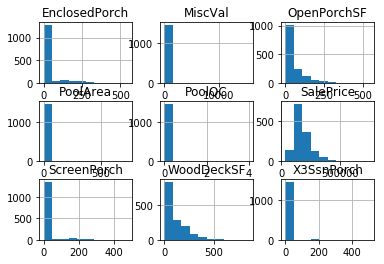

In [130]:
df_out.hist()

#### 1. Remove "PoolArea" and "MiscVal" (poor predictors)

#### 2. Combined porches

### BATHROOM CORRELATIONS

In [56]:
df_bath = df_clean[['BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath',
             'SalePrice']]

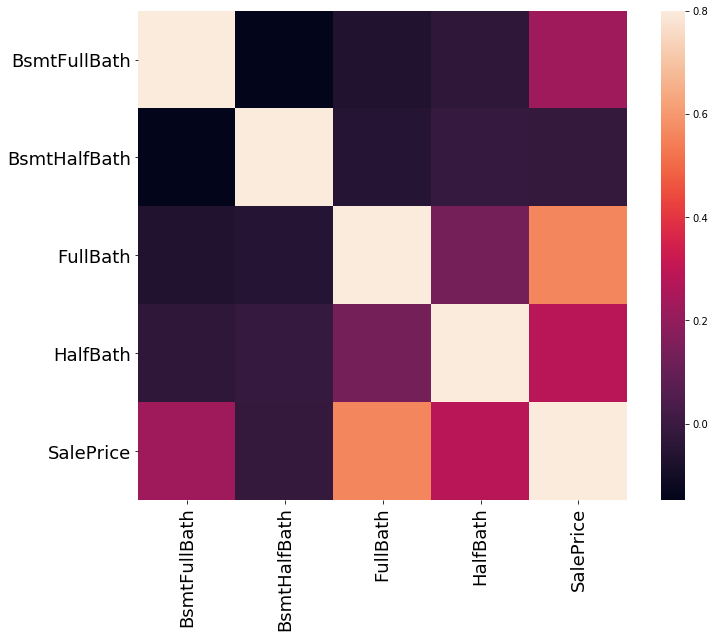

In [57]:
corrmat = df_bath.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [58]:
print(df_bath.corr())

              BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  SalePrice
BsmtFullBath      1.000000     -0.147871 -0.064512 -0.030905   0.227122
BsmtHalfBath     -0.147871      1.000000 -0.054536 -0.012340  -0.016844
FullBath         -0.064512     -0.054536  1.000000  0.136381   0.560664
HalfBath         -0.030905     -0.012340  0.136381  1.000000   0.284108
SalePrice         0.227122     -0.016844  0.560664  0.284108   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18ff4358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1917b2e8>]], dtype=object)

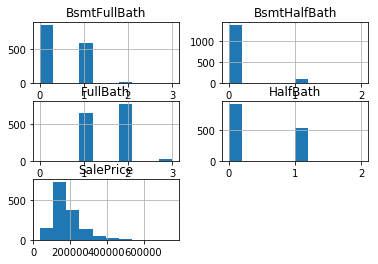

In [87]:
df_bath.hist()

#### 1. Combine bathrooms (0.5* half + 1* full)

### SQUARE FEET CORRELATIONS

In [68]:
df_sq = df_clean[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'SalePrice']]

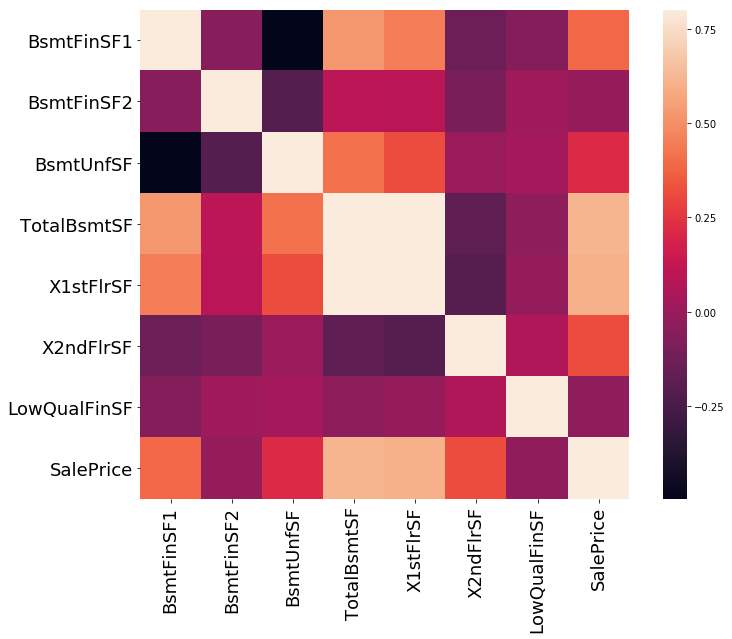

In [69]:
corrmat = df_sq.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [86]:
print(df_sq.corr())

              BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  X1stFlrSF  \
BsmtFinSF1      1.000000   -0.050117  -0.495251     0.522396   0.445863   
BsmtFinSF2     -0.050117    1.000000  -0.209294     0.104810   0.097117   
BsmtUnfSF      -0.495251   -0.209294   1.000000     0.415360   0.317987   
TotalBsmtSF     0.522396    0.104810   0.415360     1.000000   0.819530   
X1stFlrSF       0.445863    0.097117   0.317987     0.819530   1.000000   
X2ndFlrSF      -0.137079   -0.099260   0.004469    -0.174512  -0.202646   
LowQualFinSF   -0.064503    0.014807   0.028167    -0.033245  -0.014241   
SalePrice       0.386420   -0.011378   0.214479     0.613581   0.605852   

              X2ndFlrSF  LowQualFinSF  SalePrice  
BsmtFinSF1    -0.137079     -0.064503   0.386420  
BsmtFinSF2    -0.099260      0.014807  -0.011378  
BsmtUnfSF      0.004469      0.028167   0.214479  
TotalBsmtSF   -0.174512     -0.033245   0.613581  
X1stFlrSF     -0.202646     -0.014241   0.605852  
X2ndFlrSF      1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a191c4d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a194a2d68>]], dtype=object)

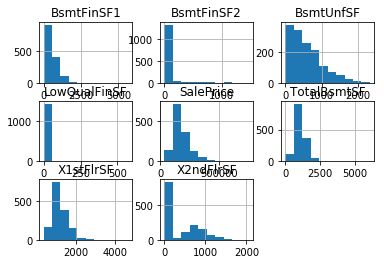

In [88]:
df_sq.hist()

#### 1. Can remove "LowQualFinSF" (poor predictor)

### GARAGE CORRELATIONS

In [94]:
df_gar = df_clean[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'SalePrice']]

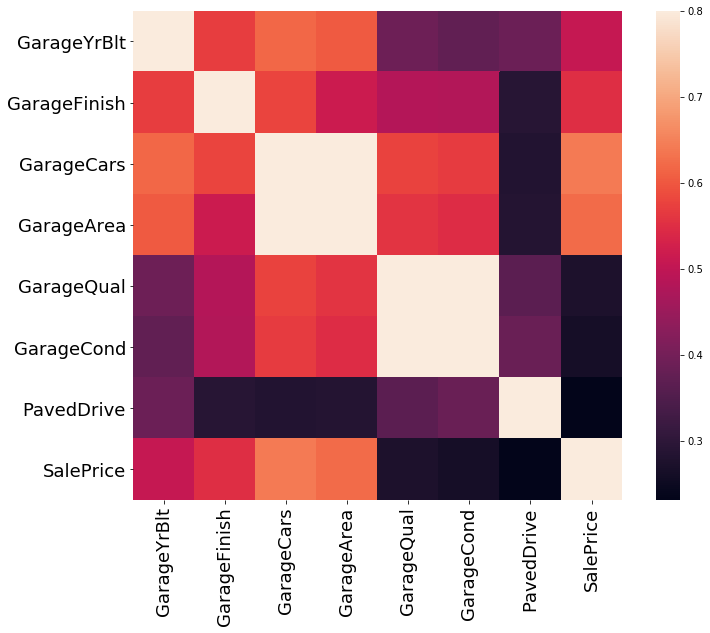

In [95]:
corrmat = df_gar.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [97]:
print(df_gar.corr())

              GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
GarageYrBlt      1.000000      0.570138    0.619897    0.602803    0.389520   
GarageFinish     0.570138      1.000000    0.579729    0.516428    0.482399   
GarageCars       0.619897      0.579729    1.000000    0.882475    0.576622   
GarageArea       0.602803      0.516428    0.882475    1.000000    0.558938   
GarageQual       0.389520      0.482399    0.576622    0.558938    1.000000   
GarageCond       0.374172      0.481813    0.568408    0.547259    0.959172   
PavedDrive       0.388909      0.289556    0.284598    0.284885    0.364972   
SalePrice        0.508043      0.549247    0.640409    0.623431    0.273839   

              GarageCond  PavedDrive  SalePrice  
GarageYrBlt     0.374172    0.388909   0.508043  
GarageFinish    0.481813    0.289556   0.549247  
GarageCars      0.568408    0.284598   0.640409  
GarageArea      0.547259    0.284885   0.623431  
GarageQual      0.959172    0.364972  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a198fe908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x105516828>]], dtype=object)

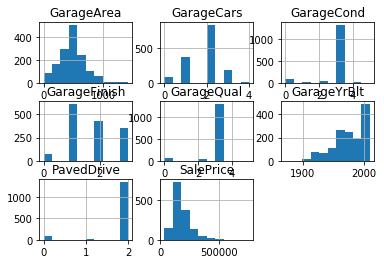

In [98]:
df_gar.hist()

#### 1. Combine GarageCond and GarageQual

#### 2. Remove PavedDrive (poor predictor)

### Exterior Quality Correlations

In [104]:
df_ext = df_clean[['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
            'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'SalePrice']]
df_ext.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,SalePrice
MSSubClass,,,,,,,,,,
60,Gable,CompShg,VinylSd,VinylSd,1,196,Gd,TA,PConc,208500
20,Gable,CompShg,MetalSd,MetalSd,0,0,TA,TA,CBlock,181500
60,Gable,CompShg,VinylSd,VinylSd,1,162,Gd,TA,PConc,223500
70,Gable,CompShg,Wd Sdng,Wd Shng,0,0,TA,TA,BrkTil,140000
60,Gable,CompShg,VinylSd,VinylSd,1,350,Gd,TA,PConc,250000


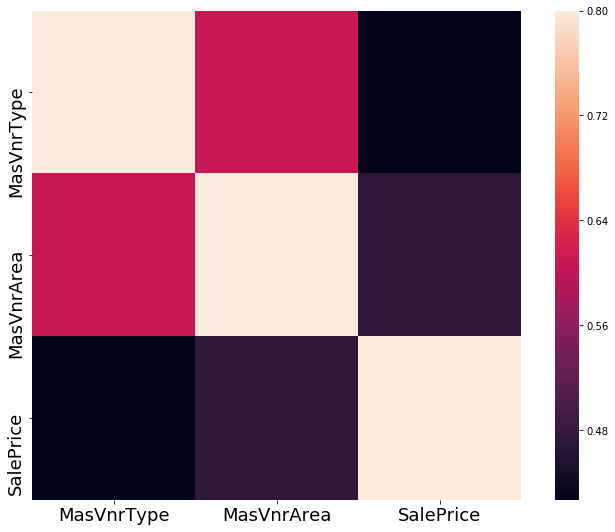

In [101]:
corrmat = df_ext.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [102]:
print(df_ext.corr())

            MasVnrType  MasVnrArea  SalePrice
MasVnrType    1.000000    0.606194   0.426703
MasVnrArea    0.606194    1.000000   0.472614
SalePrice     0.426703    0.472614   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a552828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a68cba8>]], dtype=object)

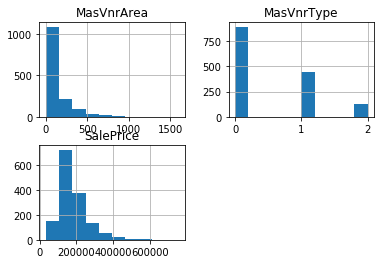

In [112]:
df_ext.hist()

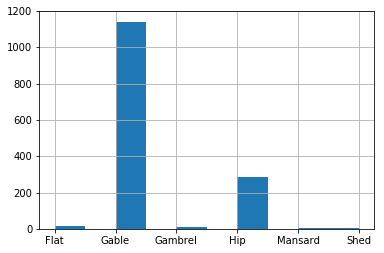

In [108]:
df_ext['RoofStyle'].hist()

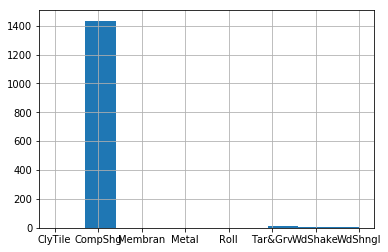

In [109]:
df_ext['RoofMatl'].hist()

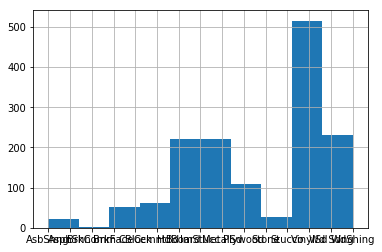

In [110]:
df_ext['Exterior1st'].hist()

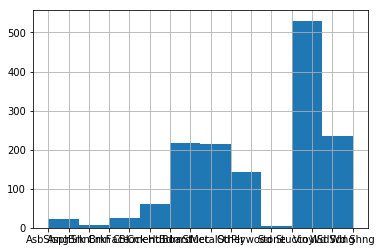

In [111]:
df_ext['Exterior2nd'].hist()

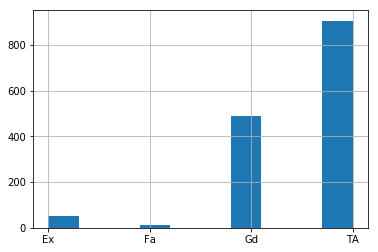

In [113]:
df_ext['ExterQual'].hist()

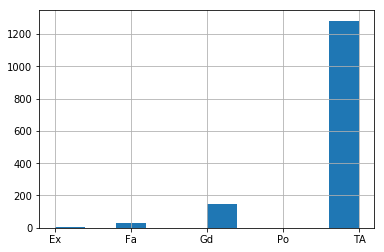

In [106]:
df_ext['ExterCond'].hist()

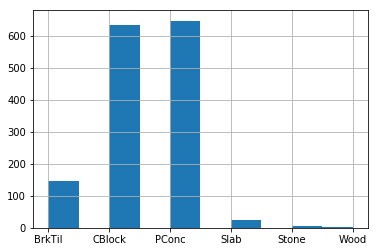

In [107]:
df_ext['Foundation'].hist()

#### 1. Remove "ExterCond" and "RoofMatl"

### Sales Correlations

In [120]:
df_sale = df_clean[['MoSold', 'YrSold', 'SaleType', 'SaleCondition',
                   'SalePrice']]

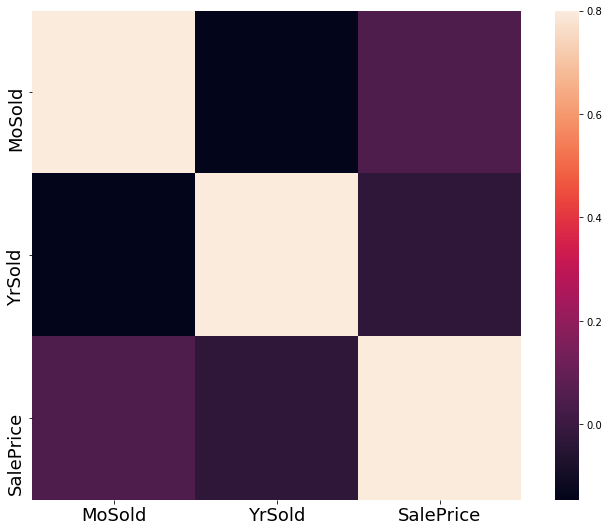

In [121]:
corrmat = df_sale.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [122]:
print(df_sale.corr())

             MoSold    YrSold  SalePrice
MoSold     1.000000 -0.145721   0.046432
YrSold    -0.145721  1.000000  -0.028923
SalePrice  0.046432 -0.028923   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aadc438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1ab86eb8>]], dtype=object)

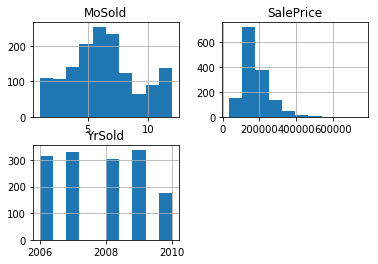

In [123]:
df_sale.hist()

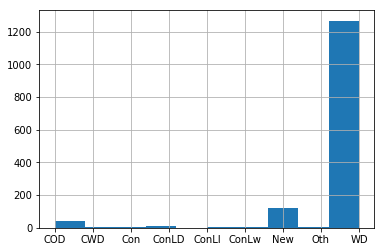

In [125]:
df_sale['SaleType'].hist()

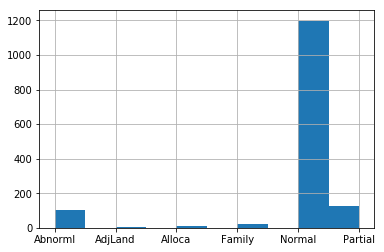

In [126]:
df_sale['SaleCondition'].hist()

#### 1. Remove MoSold, YoSold

### NEIGHBOURHOOD CORRELATIONS

In [142]:
df_neg = df_clean[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 
            'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
            'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'SalePrice']]

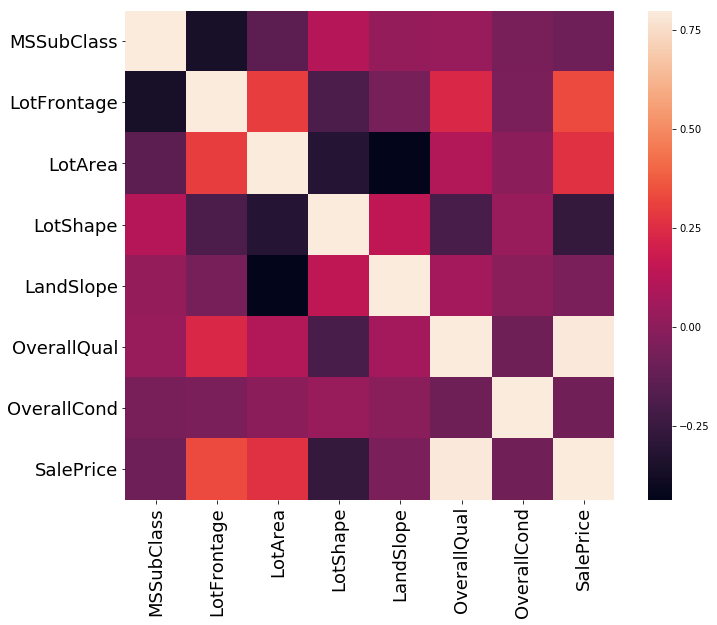

In [143]:
corrmat = df_neg.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [144]:
print(df_neg.corr())

             MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  \
MSSubClass     1.000000    -0.356286 -0.139781  0.115361   0.025672   
LotFrontage   -0.356286     1.000000  0.302265 -0.185975  -0.063675   
LotArea       -0.139781     0.302265  1.000000 -0.315484  -0.436868   
LotShape       0.115361    -0.185975 -0.315484  1.000000   0.144248   
LandSlope      0.025672    -0.063675 -0.436868  0.144248   1.000000   
OverallQual    0.032628     0.235326  0.105806 -0.198994   0.066450   
OverallCond   -0.059316    -0.053703 -0.005636  0.033747  -0.010355   
SalePrice     -0.084284     0.334544  0.263843 -0.267759  -0.051152   

             OverallQual  OverallCond  SalePrice  
MSSubClass      0.032628    -0.059316  -0.084284  
LotFrontage     0.235326    -0.053703   0.334544  
LotArea         0.105806    -0.005636   0.263843  
LotShape       -0.198994     0.033747  -0.267759  
LandSlope       0.066450    -0.010355  -0.051152  
OverallQual     1.000000    -0.091932   0.790982  
Ove

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b3b8cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b5b5b00>]], dtype=object)

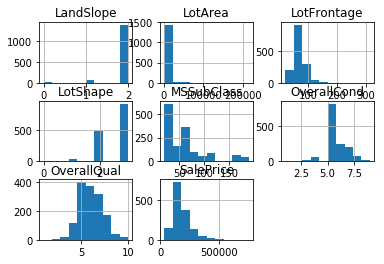

In [145]:
df_neg.hist()

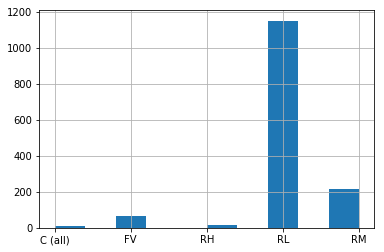

In [147]:
df_neg['MSZoning'].hist()

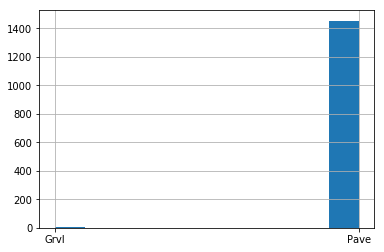

In [148]:
df_neg['Street'].hist()

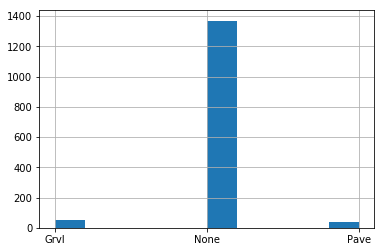

In [149]:
df_neg['Alley'].hist()

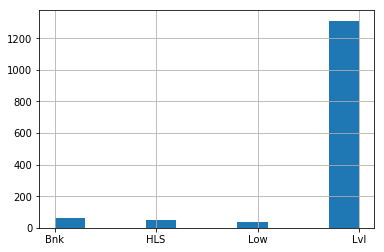

In [150]:
df_neg['LandContour'].hist()

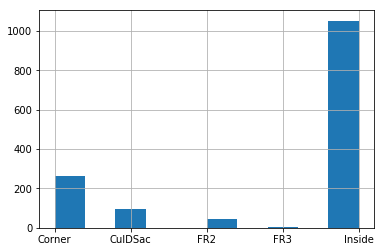

In [151]:
df_neg['LotConfig'].hist()

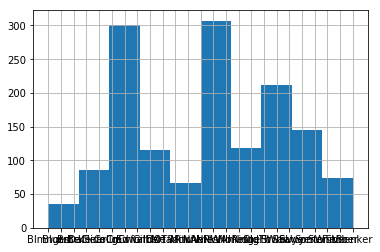

In [152]:
df_neg['Neighborhood'].hist()

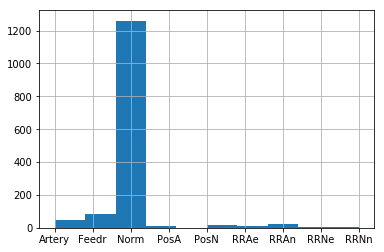

In [153]:
df_neg['Condition1'].hist()

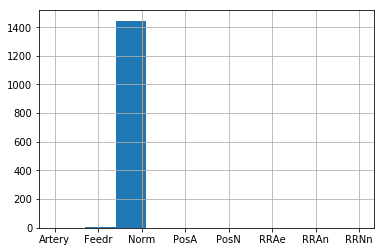

In [154]:
df_neg['Condition2'].hist()

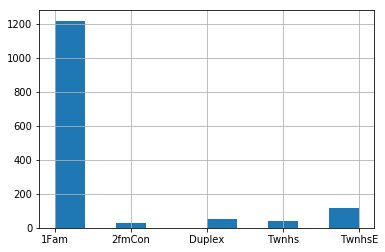

In [155]:
df_neg['BldgType'].hist()

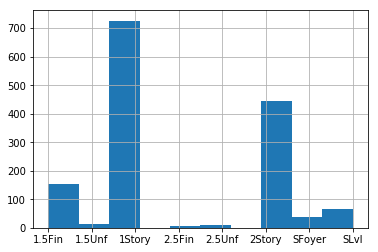

In [156]:
df_neg['HouseStyle'].hist()

#### 1. Remove LandSlope, Street, Alley, Condition1, Condition2, LandContour

#### 2. Combine overall condition and overall quality

### HOUSE CORRELATIONS

In [159]:
df_hou = df_clean[['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 
            'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
            'Fireplaces', 'FireplaceQu', 'SalePrice']]

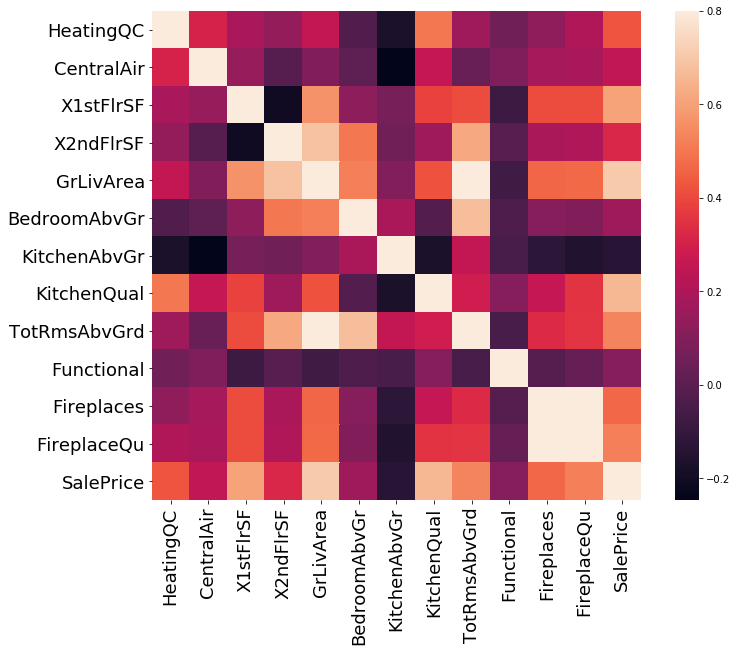

In [161]:
corrmat = df_hou.corr()
f, ax = plt.subplots(figsize=(12, 9))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.heatmap(corrmat, vmax=.8, square=True);

In [162]:
print(df_hou.corr())

              HeatingQC  CentralAir  X1stFlrSF  X2ndFlrSF  GrLivArea  \
HeatingQC      1.000000    0.306294   0.189888   0.141901   0.254644   
CentralAir     0.306294    1.000000   0.146953  -0.011803   0.093666   
X1stFlrSF      0.189888    0.146953   1.000000  -0.202646   0.566024   
X2ndFlrSF      0.141901   -0.011803  -0.202646   1.000000   0.687501   
GrLivArea      0.254644    0.093666   0.566024   0.687501   1.000000   
BedroomAbvGr  -0.026869    0.007872   0.127401   0.502901   0.521270   
KitchenAbvGr  -0.171416   -0.246797   0.068101   0.059306   0.100063   
KitchenQual    0.504228    0.257830   0.387027   0.168810   0.420563   
TotRmsAbvGrd   0.164904    0.034509   0.409516   0.616423   0.825489   
Functional     0.058352    0.091402  -0.077456  -0.005032  -0.068202   
Fireplaces     0.129689    0.186309   0.410531   0.194561   0.461679   
FireplaceQu    0.207500    0.187776   0.407887   0.207129   0.469947   
SalePrice      0.427649    0.251328   0.605852   0.319334   0.70

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a8e1978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c40c908>]], dtype=object)

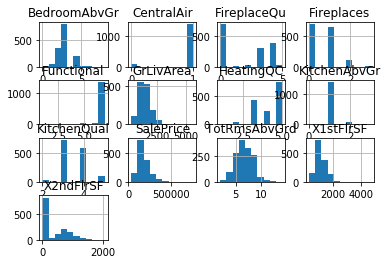

In [163]:
df_hou.hist()

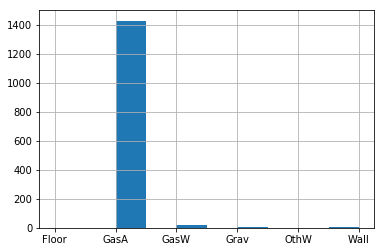

In [166]:
df_hou['Heating'].hist()

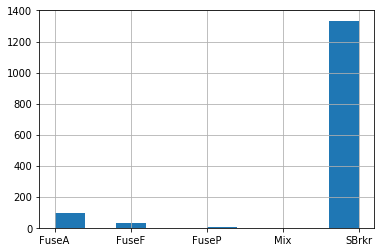

In [167]:
df_hou['Electrical'].hist()

#### 1. Remove KitchenAbvGr, Heating, Electrical

#### 2. Remove TotRmsAbvGrd (highly correlated to GrLivArea)

#### 3. Remove Fireplaces (highly correlated to Fireplace Quality)